# 1. Regularization

### 1.1 Lasso

In [98]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso, LassoCV, Ridge, RidgeCV

In [99]:
data = pd.read_csv("Hitters.csv")
data = data.dropna()

In [100]:
x = data.drop(columns = ['League','Division','NewLeague','Salary'])
x = x.drop(x.columns[0],axis = 1)
x.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,632,43,10
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,880,82,14
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,200,11,3
4,321,87,10,39,42,30,2,396,101,12,48,46,33,805,40,4
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,282,421,25


In [107]:
y = data.Salary
y.head()

1    475.0
2    480.0
3    500.0
4     91.5
5    750.0
Name: Salary, dtype: float64

In [113]:
lasso = Lasso(max_iter = 10000, normalize = True)
alphas = np.logspace(-5, 5, 1000)
coefs = []
flag = 0
predictors_left = []
for a in alphas:
    lasso.set_params(alpha = a)
    lasso.fit(x, y)
    coefs.append(lasso.coef_)
    num = 0
    for c in lasso.coef_:
        if c != 0:
            num += 1
    if (num == 3) and (flag == 0):
        predictors_left = lasso.coef_
        flag = 1
        #print(predictors_left)
        
predictors = []
for i,j in enumerate(predictors_left):
    if j != 0:
        predictors.append(data.columns[i+1])
#print(predictors)
print("The final three predictors left are", predictors)    


The final three predictors left are ['Hits', 'CRuns', 'CRBI']


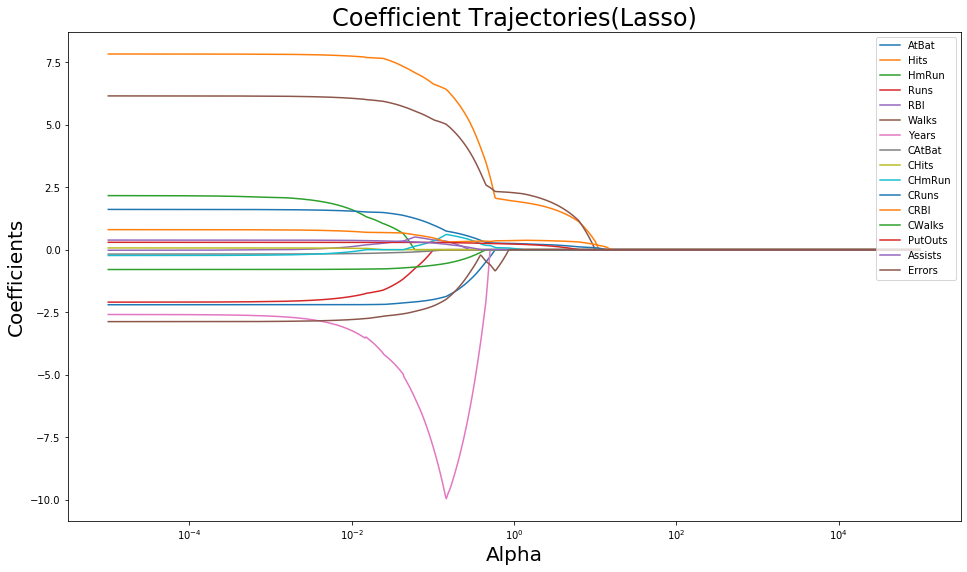

In [112]:
plt.figure(figsize = (16,9))
graph_Lasso = plt.gca()
graph_Lasso.plot(alphas, coefs)
graph_Lasso.set_xscale('log')
plt.xlabel('Alpha', fontsize = 20)
plt.ylabel('Coefficients', fontsize = 20)
plt.title('Coefficient Trajectories(Lasso)', fontsize = 24)
plt.legend(list(x), loc = 'upper right')
plt.show()

In [57]:
lasso_cv = LassoCV(cv = 10, max_iter = 10000, normalize = True)
lasso_cv.fit(x, y)
print("The optimal value of regularization penalty is", lasso_cv.alpha_)

The optimal value of regularization penalty is 0.0635481759985745


In [56]:
lasso = Lasso(alpha = lasso_cv.alpha_, max_iter= 10000, normalize = True)
lasso.fit(x,y)
coef_left = []
for c in lasso.coef_:
    if c != 0:
        coef_left.append(c)   
print("There are %d predictors left in the model with optimal value of the regularization penalty" %len(coef_left))

There are 14 predictors left in the model with optimal value of the regularization penalty


## 1.2 Ridge

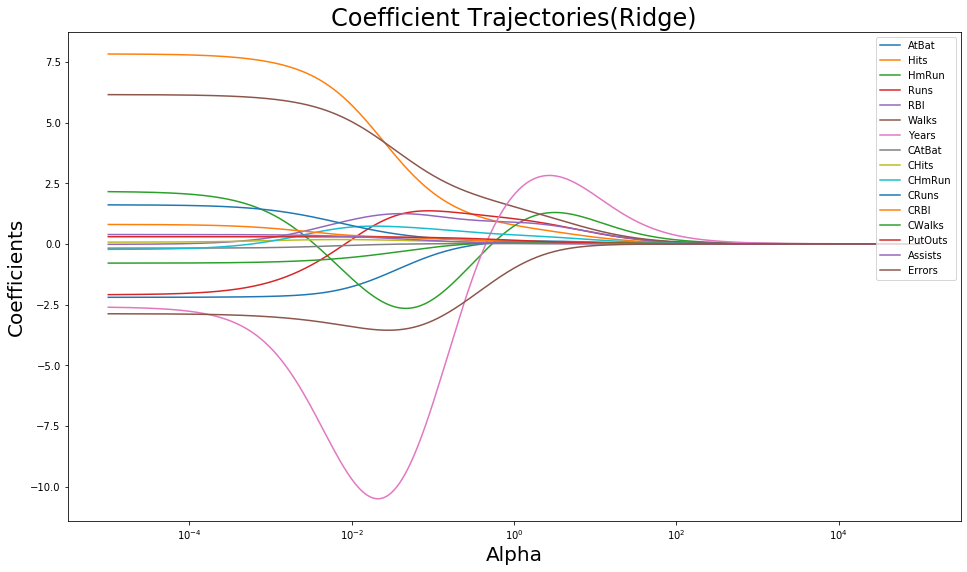

In [109]:
ridge = Ridge(max_iter = 10000, normalize = True)
alphas = np.logspace(-5, 5, 1000)
coefs = []
for a in alphas:
    ridge.set_params(alpha = a)
    ridge.fit(x, y)
    coefs.append(ridge.coef_)

plt.figure(figsize = (16,9))
graph_Ridge = plt.gca()
graph_Ridge.plot(alphas, coefs)
graph_Ridge.set_xscale('log')
plt.xlabel('Alpha', fontsize = 20)
plt.ylabel('Coefficients', fontsize = 20)
plt.title('Coefficient Trajectories(Ridge)', fontsize = 24)
plt.legend(list(x), loc = 'upper right')
plt.show()


In [84]:
ridge_cv = RidgeCV(cv = 10, normalize = True)
ridge_cv.fit(x, y)
print("The optimal value of regularization penalty is", ridge_cv.alpha_)

The optimal value of regularization penalty is 1.0


# 2 Short Answer

(1)Explain in your own words the bias-variance tradeoff. 
(2)What role does regularization play in this tradeoff? 
(3)Make reference to your findings in number (1) to describe models of high/low bias and variance.

Answer: 
(1)Bias and variance are two kinds of prediction erros in prediction model. Bias measures how far the predictions are from the correct value while viriance measures how much the predtions vary from each other. And they are related to model complexity. When the model complexity increases, bias is reduced and variance is increased. So in prediction model, we need to make a tradeoff between them.
(2)In practice, when we have very high model complexity, we'll encounter over-fitting(high variance and low bias). And regularization is used to prevent over-fitting by generating much lower variance and a little bit higher bias.
(3)Both Lasso and Ridge regressions are adding regularization penalty to linear regression. Their only difference is the penalty terms. As the penalty alpha becomes larger, we'll get lower variance and high bias to prevent over-fitting. So we can find an optimal value of penalty to achieve good performance of the model.